In [50]:
import numpy as np
import pandas as pd 
import os

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import cv2, PIL, glob, pathlib

In [52]:
normal = pathlib.Path("/content/drive/MyDrive/dataset/normal")
cataract = pathlib.Path("/content/drive/MyDrive/dataset/cataract")

In [53]:
images_dict = {"normal": list(normal.glob("*.jpg")),
              "cataract":list(cataract.glob("*.jpg"))}
labels_dict = {
    "normal":0, "cataract":1
}

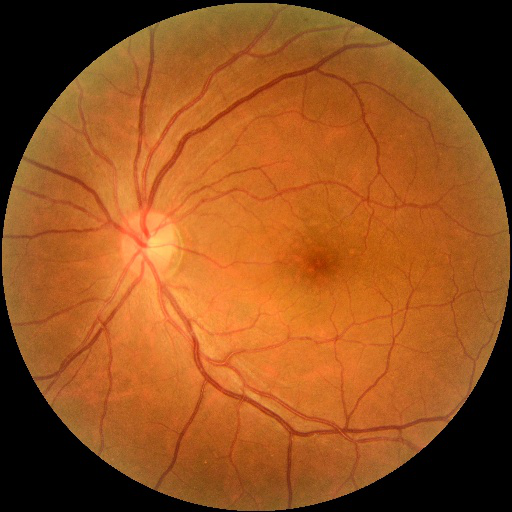

In [54]:
PIL.Image.open(str(images_dict["normal"][100]))

# Data Preprocessing : 

In [31]:
X, y = [], []
for label, images in images_dict.items():
    for image in images:
        image = cv2.imread(str(image))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (180, 180))
        if image is not None:
            X.append(image) 
            y.append(labels_dict[label]) 

In [32]:
X = np.array(X)
y = np.array(y)

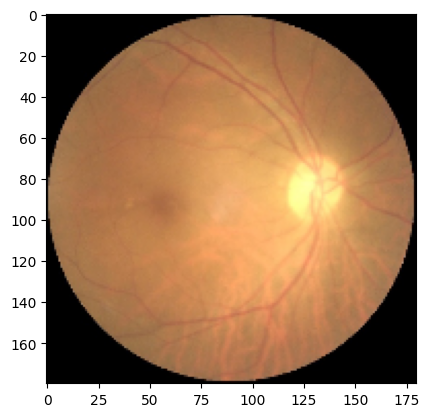

In [33]:
plt.imshow(X[0])
plt.show()

In [34]:
X = X/255

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

# Model Building and Training : 

In [37]:
import tensorflow as tf
from tensorflow import keras
from keras import models, layers

In [38]:
data_argumentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomRotation(0.2),
    keras.layers.experimental.preprocessing.RandomContrast(0.3),
    keras.layers.experimental.preprocessing.RandomZoom(0.3),
    keras.layers.experimental.preprocessing.RandomZoom(0.7)
])

In [39]:
model = keras.Sequential([
    data_argumentation,
    layers.Conv2D(64, (5, 5), padding="same",   input_shape=(180, 180, 3), activation="softmax"),
    layers.MaxPooling2D(),
    layers.Conv2D(32, (5, 5), padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(16, (5, 5), padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(8, (5, 5), padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(50, activation="sigmoid"),
])
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [41]:
model.fit(X_train, y_train, epochs=15)

Epoch 1/15
51/51 [==============================] - 278s 5s/step - loss: 0.7219 - accuracy: 0.4860
Epoch 2/15
51/51 [==============================] - 276s 5s/step - loss: 0.7053 - accuracy: 0.5277
Epoch 3/15
51/51 [==============================] - 277s 5s/step - loss: 0.7133 - accuracy: 0.4953
Epoch 4/15
51/51 [==============================] - 276s 5s/step - loss: 0.7055 - accuracy: 0.5078
Epoch 5/15
51/51 [==============================] - 275s 5s/step - loss: 0.6979 - accuracy: 0.5264
Epoch 6/15
51/51 [==============================] - 276s 5s/step - loss: 0.6735 - accuracy: 0.5948
Epoch 7/15
51/51 [==============================] - 276s 5s/step - loss: 0.6672 - accuracy: 0.5998
Epoch 8/15
51/51 [==============================] - 275s 5s/step - loss: 0.6648 - accuracy: 0.6072
Epoch 9/15
51/51 [==============================] - 275s 5s/step - loss: 0.6470 - accuracy: 0.6321
Epoch 10/15
51/51 [==============================] - 276s 5s/step - loss: 0.6454 - accuracy: 0.6451
Epoch 11/

In [42]:
model.evaluate(X_test, y_test)

13/13 [==============================] - 17s 1s/step - loss: 0.5564 - accuracy: 0.6998


[0.5564159750938416, 0.6997518539428711]

# Model Evaluation: 

In [46]:
pred = model.predict(X_test[:30]) # predicting first 10 values
predslist = []
for i in pred:
    predslist.append(np.argmax(i)) # argmax() returns max value of an array

1/1 [==============================] - 2s 2s/step


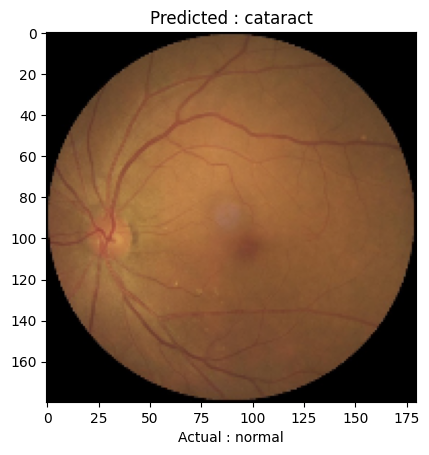

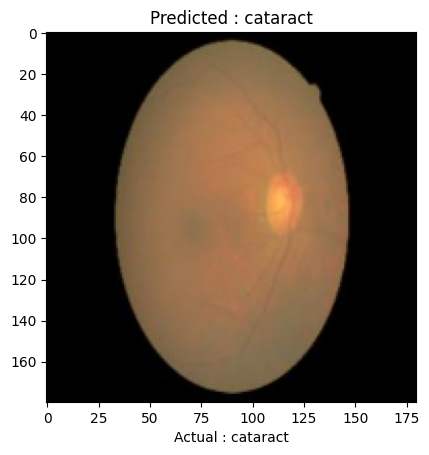

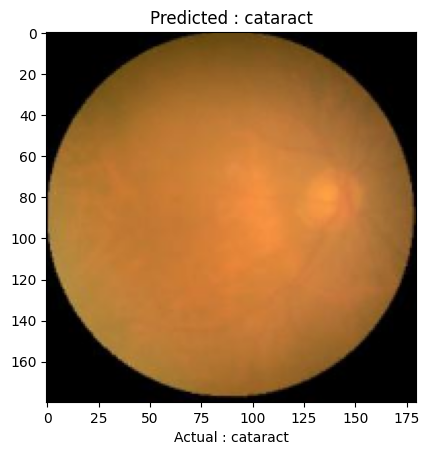

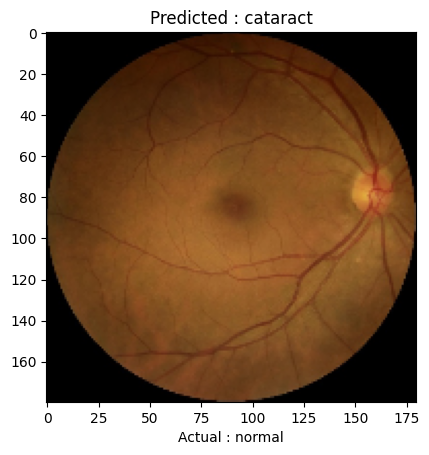

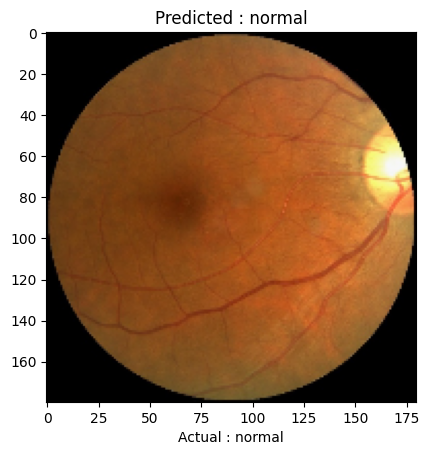

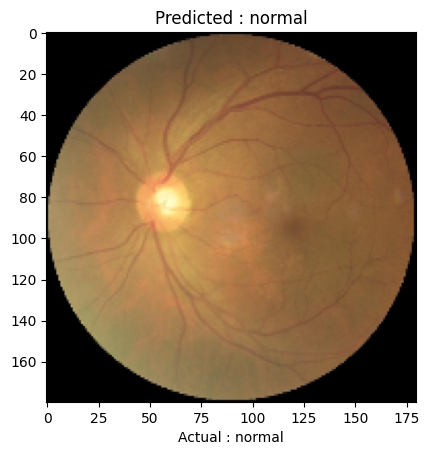

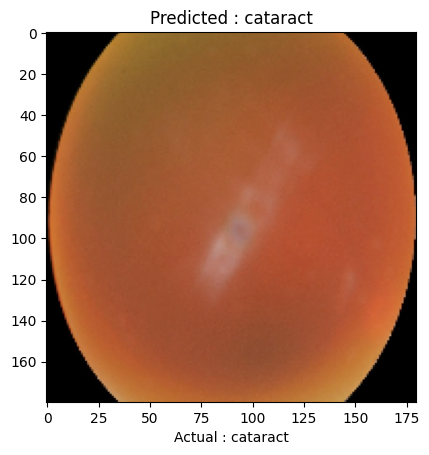

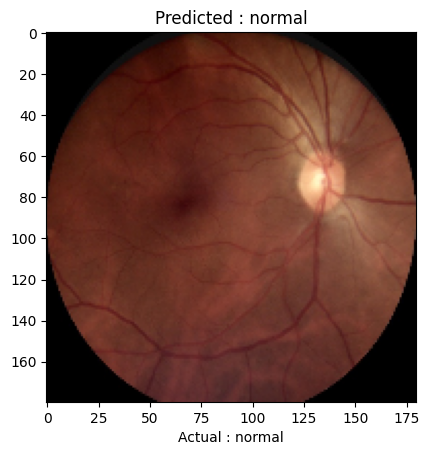

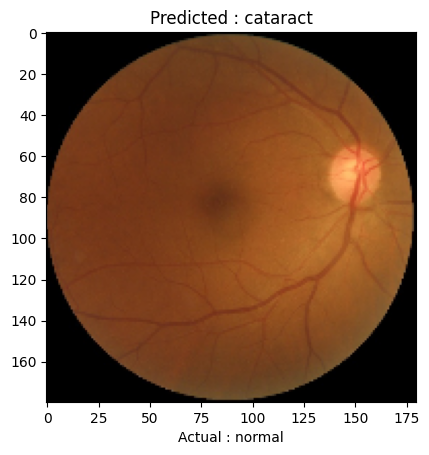

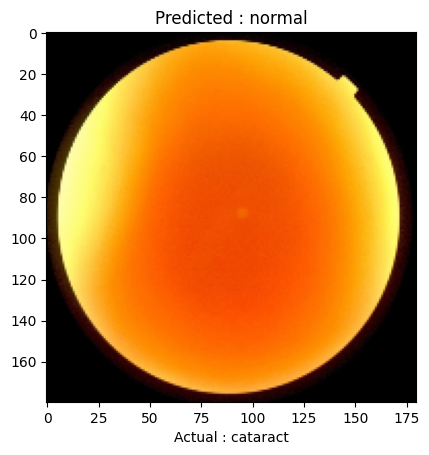

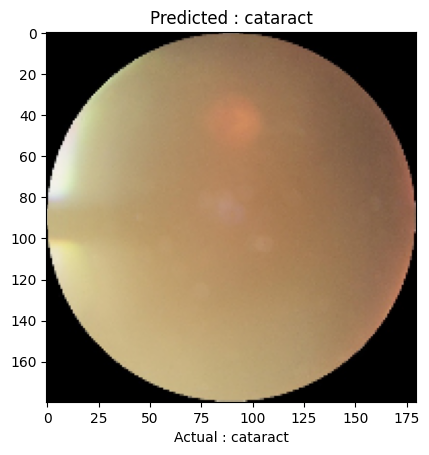

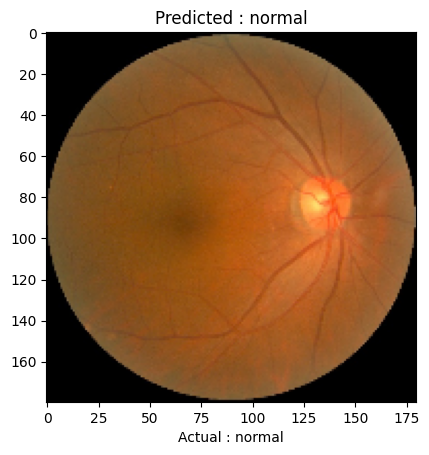

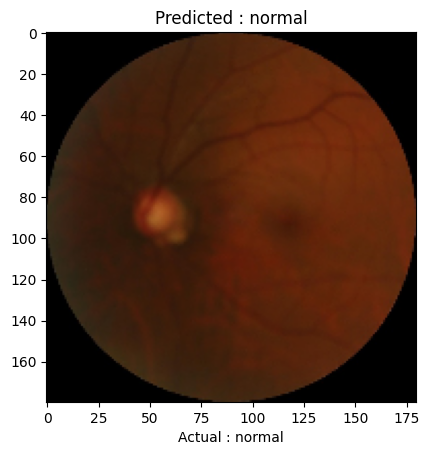

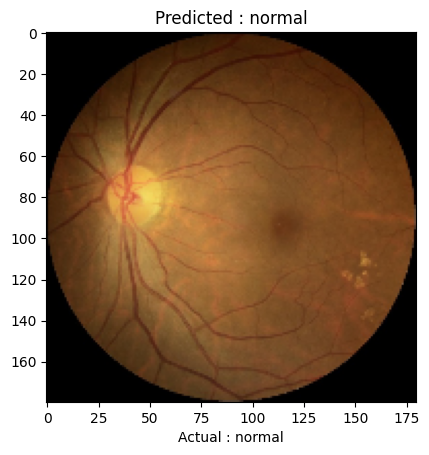

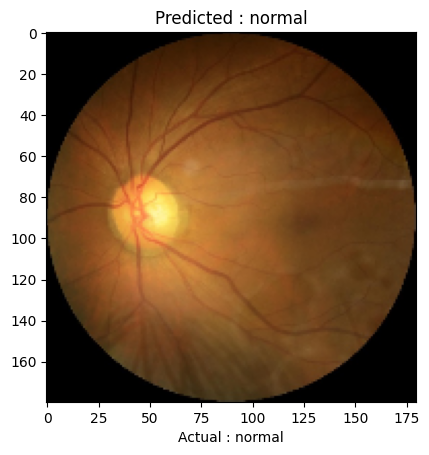

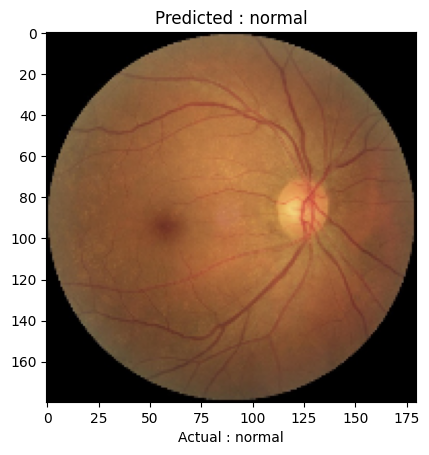

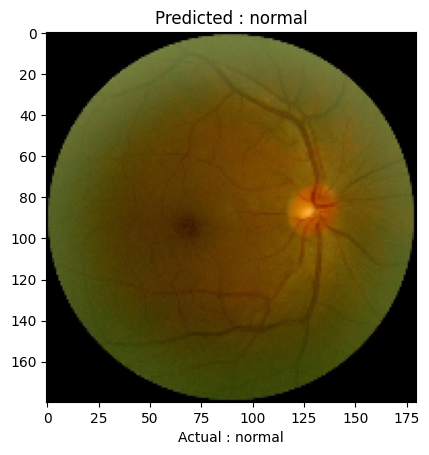

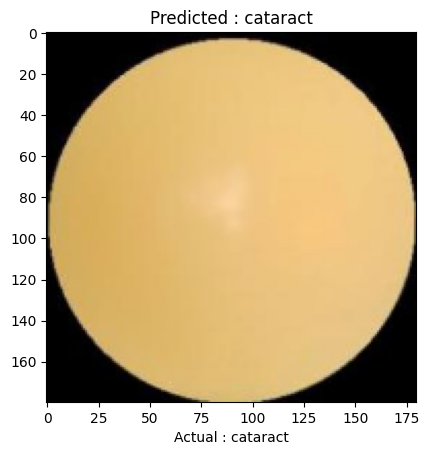

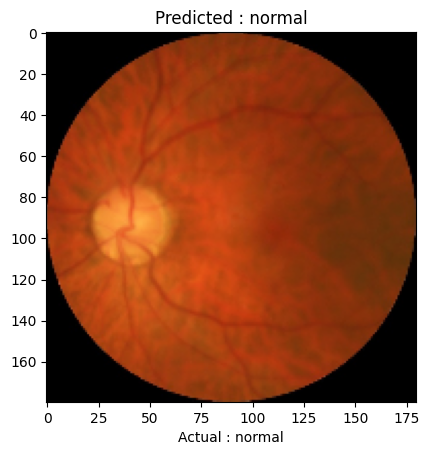

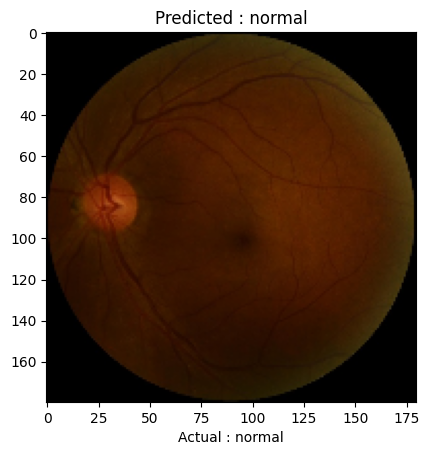

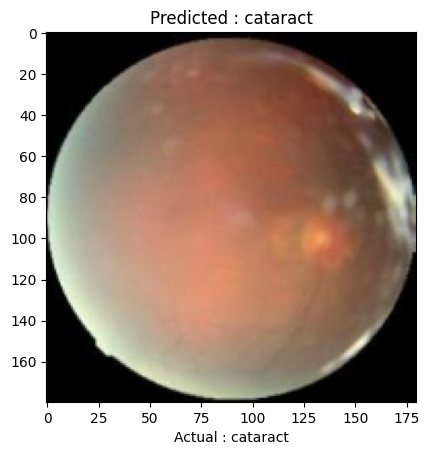

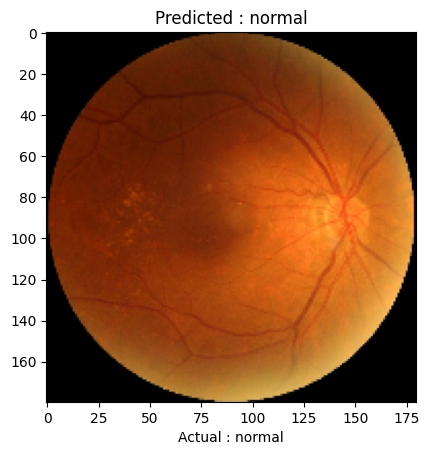

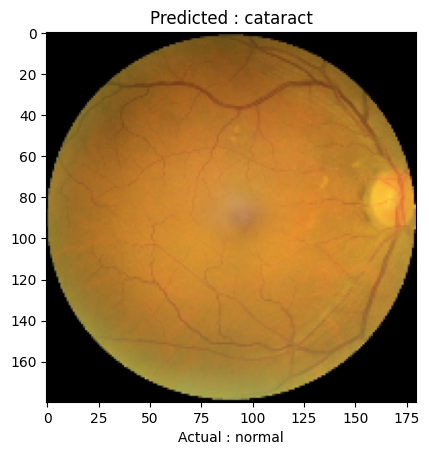

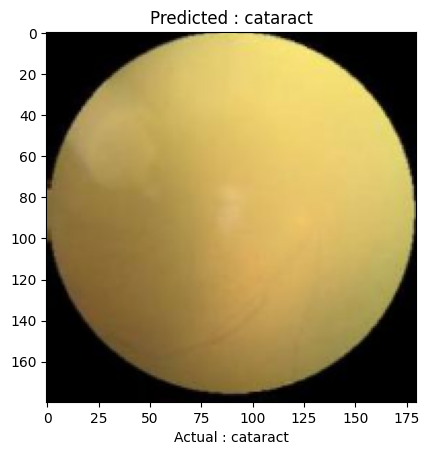

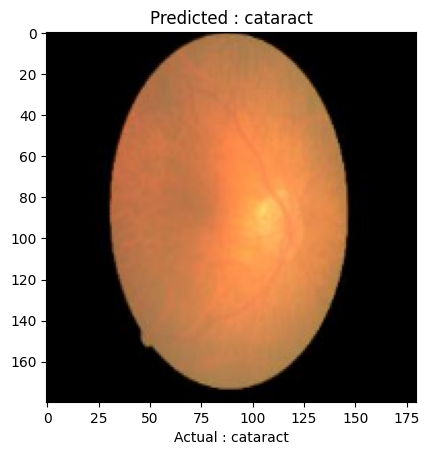

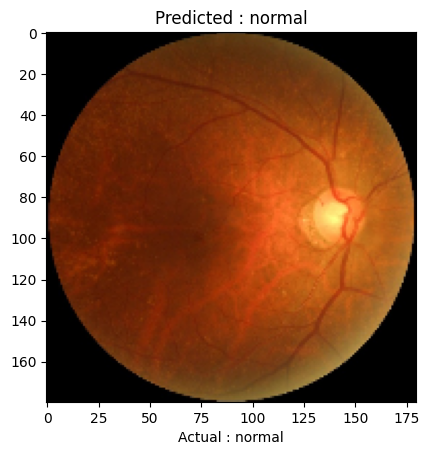

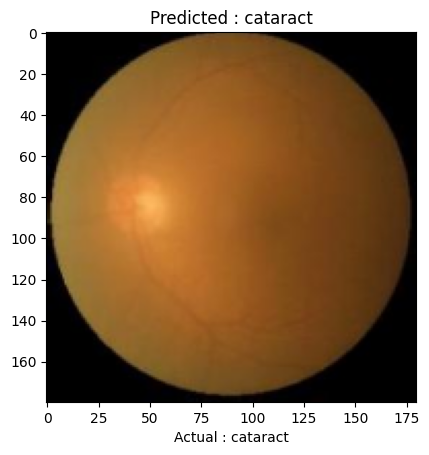

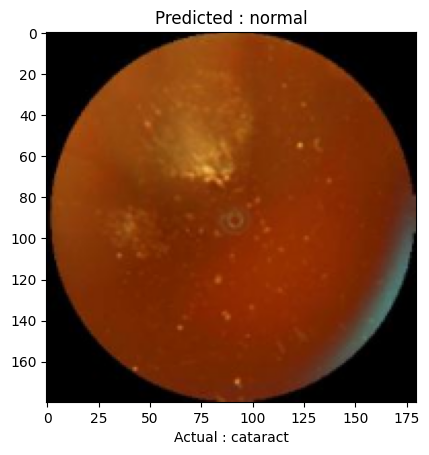

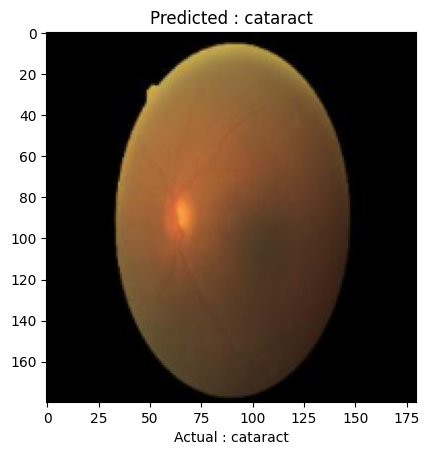

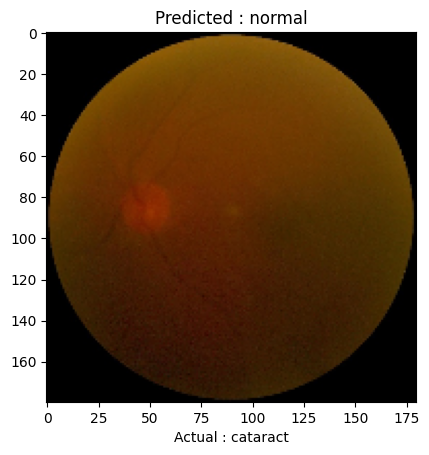

In [49]:
answers = ["normal","cataract"]
for i in range(30):
    plt.imshow(X_test[i])
    plt.title("Predicted : "+ str(answers[predslist[i]]))
    plt.xlabel("Actual : "+str(answers[y_test[i]]))
    plt.show()